# House Price Prediction using Linear Regression
This project performs regression analysis to predict house prices based on Size, Location, and Number of Rooms.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


In [2]:
# Load dataset
df = pd.read_csv("house_prices.csv")
df.head()


,Size,Location,Number_of_Rooms,Price
0,1500,urban,3,300000
1,1800,urban,4,350000
2,2400,suburban,3,400000
3,3000,rural,5,250000
4,3500,urban,4,450000


Missing values:
 Size               0
Location           0
Number_of_Rooms    0
Price              0
dtype: int64

Summary Statistics:
               Size  Number_of_Rooms          Price
count    10.000000        10.000000      10.000000
mean   2530.000000         3.700000  351000.000000
std     910.494371         0.948683  101592.869391
min    1200.000000         2.000000  200000.000000
25%    1850.000000         3.000000  270000.000000
50%    2550.000000         4.000000  340000.000000
75%    3150.000000         4.000000  437500.000000
max    4000.000000         5.000000  500000.000000


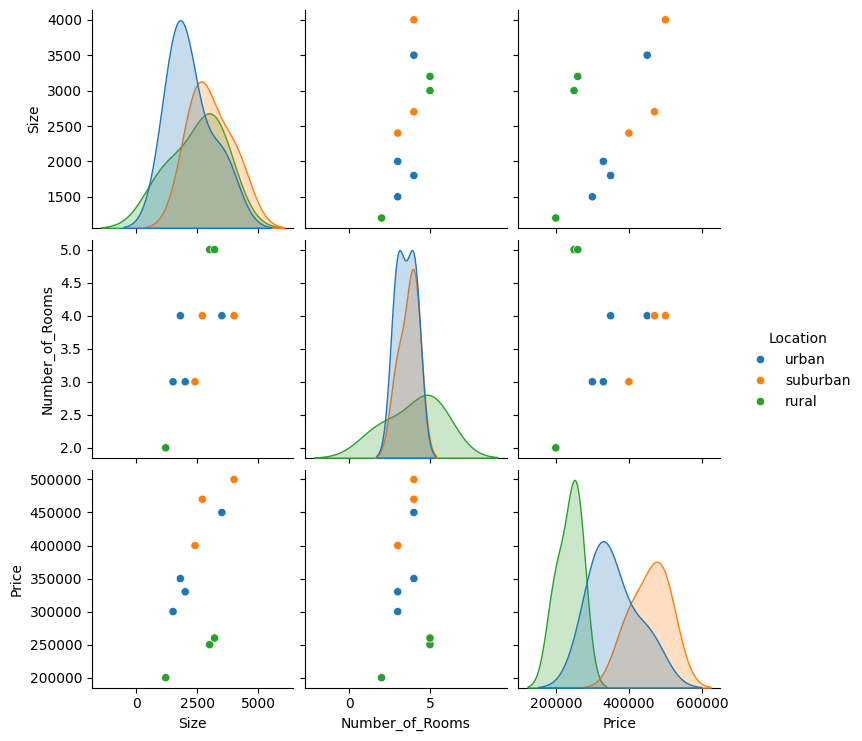

In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Visualizations
sns.pairplot(df, hue="Location")
plt.show()


In [4]:
# Define features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), ["Size", "Number_of_Rooms"]),
    ("cat", OneHotEncoder(), ["Location"])
])


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Pipeline with preprocessing and regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train the model
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [7]:
# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Comparison
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nPrediction Comparison:\n", comparison)


RMSE: 76878.94637587787
R² Score: -0.6417701099625297

Prediction Comparison:
    Actual      Predicted
8  470000  383658.536585
1  350000  283925.069148


In [8]:
# Retrieve coefficients and feature names
reg = model.named_steps['regressor']
features = model.named_steps['preprocessor'].transformers_[0][2] +            list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(["Location"]))

coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": reg.coef_
})

coefficients = coefficients.sort_values(by="Coefficient", key=abs, ascending=False)
print("Feature Importance:")
print(coefficients)


Feature Importance:
             Feature   Coefficient
0               Size  85982.759715
2     Location_rural -78162.140642
3  Location_suburban  47164.110301
1    Number_of_Rooms -39517.874946
4     Location_urban  30998.030341
